# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Montly Car Sales

Sofia Velasquez 22049

José Marchena 22398

### 0. Obtencion de datos

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
car_sales = pd.read_csv(
    './data/monthly-car-sales.csv', 
    parse_dates=['Month'], 
    index_col='Month',
    date_parser=dateparse
)
print(car_sales.shape)

(108, 1)


C:\Users\50250\AppData\Local\Temp\ipykernel_20552\1974972431.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  car_sales = pd.read_csv(


### 1. Analisis Exploratorio

Description
              Sales
count    108.000000
mean   14595.111111
std     4525.213913
min     5568.000000
25%    11391.250000
50%    14076.000000
75%    17595.750000
max    26099.000000
Frequency distribution


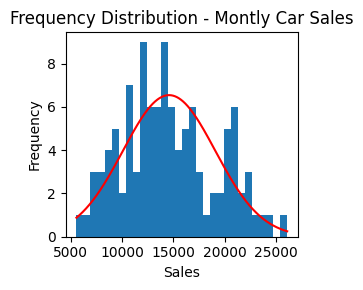

Time Series


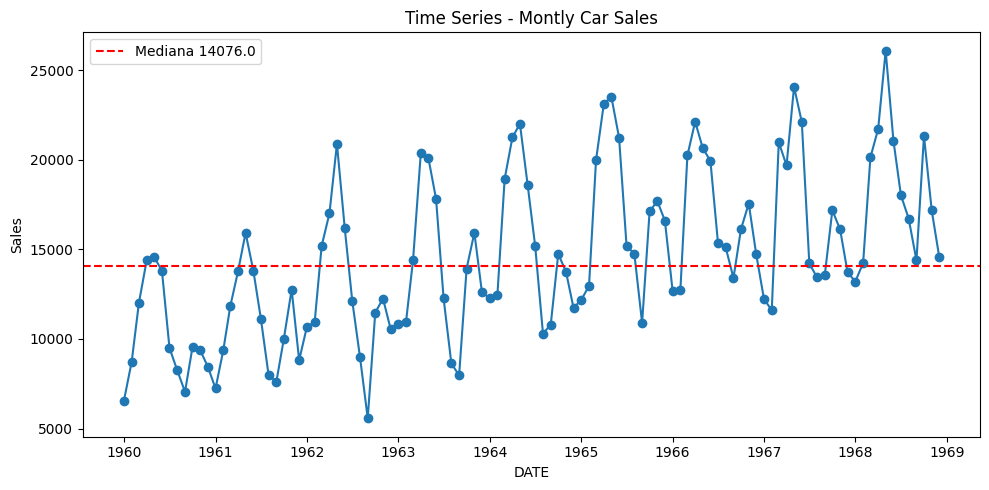

Seasonal Decompose


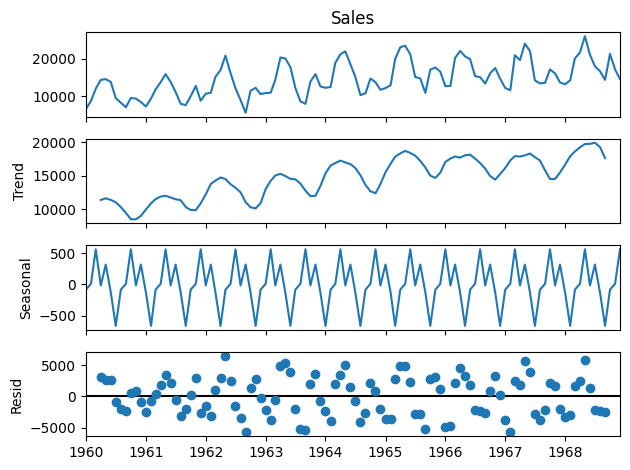

In [28]:
from scripts import analysis_graphs

value = "Sales"
title = "Montly Car Sales"

analysis_graphs(
    car_sales,
    value,
    title
)

### 2. Moving Average

ACF plot


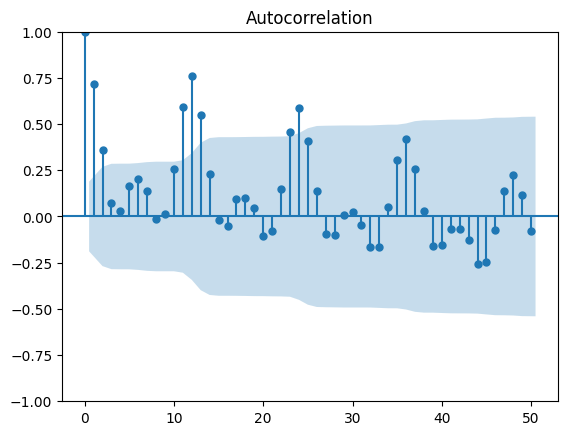

Finding Best Period
Best Lag is 11 with weight of 0.7626237302270803
Moving Average Graph


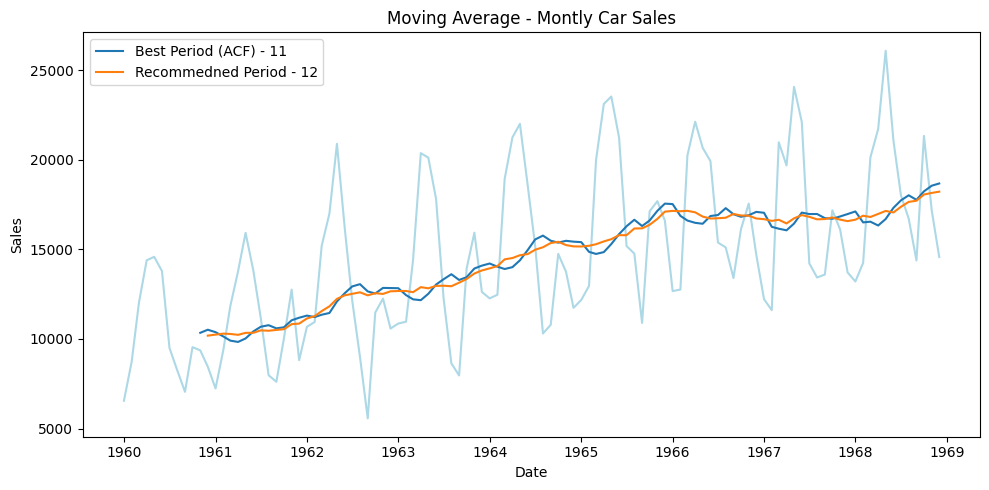

In [29]:
from scripts import moving_average
moving_average(car_sales, value, title, 12)

### 5. Modelo SARIMA 

In [30]:
car_sales.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


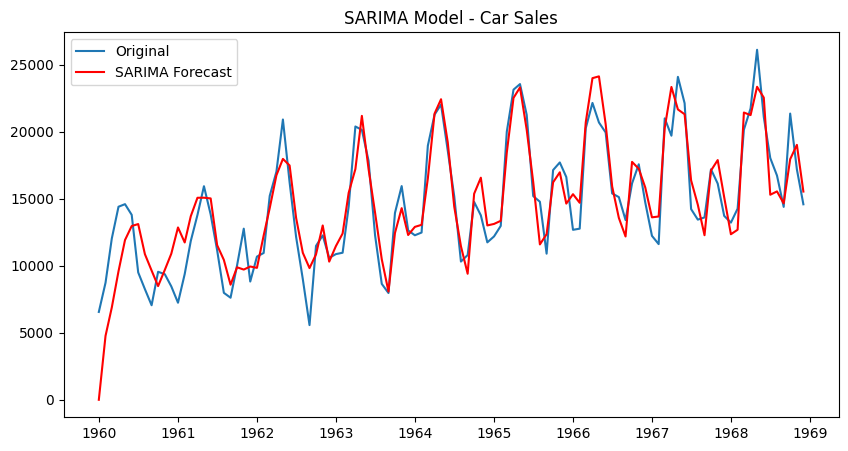

Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -837.667
Date:                            Fri, 18 Jul 2025   AIC                           1685.335
Time:                                    17:45:32   BIC                           1698.104
Sample:                                01-01-1960   HQIC                          1690.494
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2093      0.123      1.696      0.090      -0.033       0.451
ma.L1         -0.888

In [31]:
from scripts import sarima_model

# Aplicar el modelo SARIMA
sarima_model(car_sales.copy(), 'Month', 'Sales', order=(1,1,1), seasonal_order=(1,1,1,12), title="Car Sales")

*Parámetros: (1,1,1)(1,1,1,12)*

- Usé m=12 porque son ventas mensuales y tienen un ciclo anual.


### 6. Modelar serie de tiempo con Prophet

In [32]:
# !pip install plotly
# !pip install prophet

17:45:33 - cmdstanpy - INFO - Chain [1] start processing
17:45:33 - cmdstanpy - INFO - Chain [1] done processing


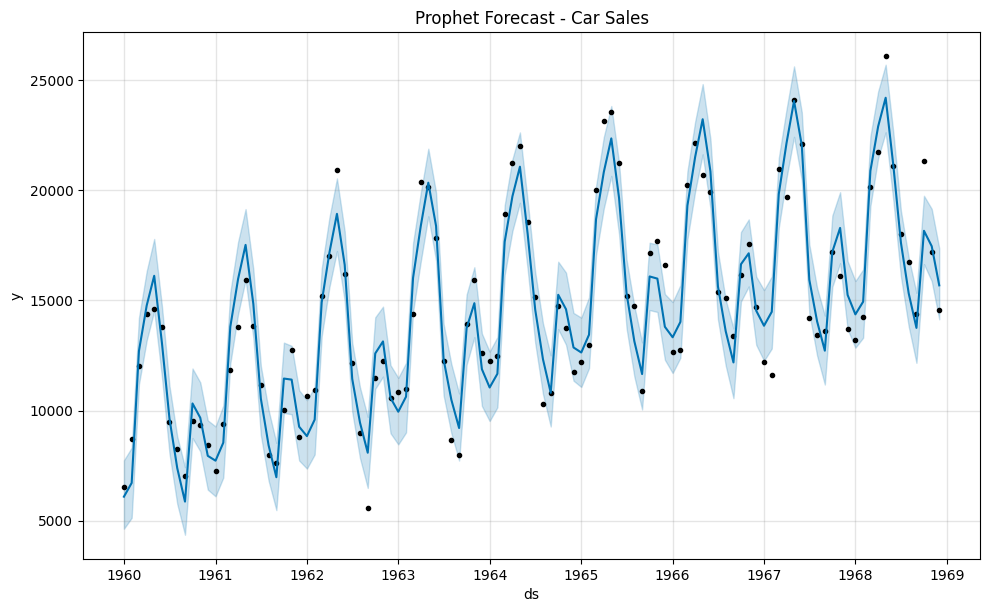

Car Sales - Prophet MSE: 1558981.27, MAE: 1025.96


In [33]:
from scripts import apply_prophet

# Aplicar Prophet
apply_prophet(car_sales.copy(), 'Month', 'Sales', title="Car Sales")

### Comparación de modelos Sarima y Prophet

In [36]:
from scripts import compare_models

# Comparar modelos SARIMA y Prophet
results = []
results.append(compare_models(car_sales, 'Month', 'Sales', (1,1,1), (1,1,1,12), "Car Sales"))

# Convertir resultados en DataFrame
comparison_df = pd.DataFrame(results)
print("\n Comparación de Modelos:\n")
print(comparison_df)

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
17:47:34 - cmdstanpy - INFO - Chain [1] start processing
17:47:34 - cmdstanpy - INFO - Chain [1] done processing



 Comparación de Modelos:

     Dataset  SARIMA_RMSE  SARIMA_MAE  Prophet_RMSE  Prophet_MAE Best_Model
0  Car Sales      2005.79     1587.98       1248.59      1025.96    Prophet
